# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
    #query_url = f"{url}appid={weather_api_key}&units={units}&q="
#query_url = f"{url}q={city}&appid={weather_api_key}"

query_url = f"{url}appid={weather_api_key}&units={units}&q=" #==> Starter Code 


#additional list needed 

lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


response = requests.get(query_url + city).json()


response

{'coord': {'lon': -69.3632, 'lat': 77.484},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 1.01,
  'feels_like': -1.7,
  'temp_min': 1.01,
  'temp_max': 1.01,
  'pressure': 1026,
  'humidity': 68,
  'sea_level': 1026,
  'grnd_level': 1021},
 'visibility': 10000,
 'wind': {'speed': 2.38, 'deg': 49, 'gust': 2.37},
 'clouds': {'all': 79},
 'dt': 1619905945,
 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0},
 'timezone': -10800,
 'id': 3831208,
 'name': 'Qaanaaq',
 'cod': 200}

In [5]:
# Loop through the list of cities and perform a request for data on each
record = 1
set_count = 1 

found_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# print(f"Beginning Data Retrieval")
# print(f"-----------------------------")

for city in cities:
    try:
    
        response = requests.get(query_url + city).json()
#         lat.append(response['coord']['lat'])
#         lng.append(response['coord']['lon'])
#         max_temp.append(response['main']['temp_max'])
#         humidity.append(response['main']['humidity'])
#         cloudiness.append(response['clouds']['all'])
#         wind_speed.append(response['wind']['speed'])
#         country.append(response['sys']['country'])
#         date.append(response['dt'])

      
        print(f"Processing Record {record} of Set {set_count} | {city}")
        
        if  record > 49 :
            record = 1
            set_count = set_count + 1
            found_cities.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])


            
        else:
            record = record + 1
            set_count= set_count
            found_cities.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
                
    except: 
        print("City not found. Skipping...")


print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")



Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | maniitsoq
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | barry
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | cidreira
Processing Record 9 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 10 of Set 1 | hermiston
Processing Record 11 of Set 1 | san vicente
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | san cristobal
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | sunel
Processing Record 21 of Set 1 | springbok
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | warqla
City not found. Skipping...
P

Processing Record 41 of Set 4 | narsaq
Processing Record 42 of Set 4 | kumluca
Processing Record 43 of Set 4 | harper
Processing Record 44 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 45 of Set 4 | salinopolis
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | cubuk
Processing Record 48 of Set 4 | were ilu
Processing Record 49 of Set 4 | palmer
Processing Record 50 of Set 4 | hoi an
Processing Record 1 of Set 5 | halifax
Processing Record 2 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 5 | santa rosa
Processing Record 4 of Set 5 | ozernovskiy
Processing Record 5 of Set 5 | sinnamary
Processing Record 6 of Set 5 | port blair
Processing Record 7 of Set 5 | thompson
Processing Record 8 of Set 5 | brigantine
Processing Record 9 of Set 5 | cacheu
Processing Record 10 of Set 5 | bonga
Processing Record 11 of Set 5 | upernavik
Processing Record 12 of Set 5 | safakulevo
Processing Recor

Processing Record 30 of Set 8 | quemado de guines
Processing Record 31 of Set 8 | marcona
City not found. Skipping...
Processing Record 32 of Set 8 | ngunguru
Processing Record 33 of Set 8 | nchelenge
Processing Record 34 of Set 8 | urusha
Processing Record 35 of Set 8 | andrushivka
Processing Record 36 of Set 8 | praia da vitoria
Processing Record 37 of Set 8 | las tunas
Processing Record 38 of Set 8 | lerici
Processing Record 39 of Set 8 | inuvik
Processing Record 40 of Set 8 | omboue
Processing Record 41 of Set 8 | launceston
Processing Record 42 of Set 8 | roros
Processing Record 43 of Set 8 | bilibino
Processing Record 44 of Set 8 | cloquet
Processing Record 45 of Set 8 | altamont
Processing Record 46 of Set 8 | manaus
Processing Record 47 of Set 8 | radenci
Processing Record 48 of Set 8 | umm lajj
Processing Record 49 of Set 8 | port lincoln
Processing Record 50 of Set 8 | guerrero negro
Processing Record 1 of Set 9 | sosnovka
Processing Record 2 of Set 9 | okha
Processing Record

Processing Record 19 of Set 12 | anzio
Processing Record 20 of Set 12 | ostrovnoy
Processing Record 21 of Set 12 | ende
Processing Record 22 of Set 12 | reconquista
Processing Record 23 of Set 12 | chegdomyn
Processing Record 24 of Set 12 | idukki
Processing Record 25 of Set 12 | sinaloa
Processing Record 26 of Set 12 | khash
Processing Record 27 of Set 12 | simpang
Processing Record 28 of Set 12 | bow island
Processing Record 29 of Set 12 | ribas do rio pardo
Processing Record 30 of Set 12 | weligama
Processing Record 31 of Set 12 | sao raimundo das mangabeiras
Processing Record 32 of Set 12 | celestun
Processing Record 33 of Set 12 | maglajani
Processing Record 34 of Set 12 | lenger
Processing Record 35 of Set 12 | alta floresta
Processing Record 36 of Set 12 | micheweni
Processing Record 37 of Set 12 | iwanai
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": found_cities,
    "lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "County": country,
    "Date": date
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

# print(f" {len(found_cities)} = {len(date)}") #==> To verify the same # of city and data points 


,City,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,County,Date
0,Hobart,-42.8794,147.3294,19.44,68,20,3.60,AU,1619760153
1,Maniitsoq,65.4167,-52.9000,1.55,74,43,2.32,GL,1619760281
2,Bluff,-46.6000,168.3333,11.11,76,33,4.92,NZ,1619760281
3,Barry,51.4067,-3.2694,5.00,81,57,2.57,GB,1619760181
4,Mataura,-46.1927,168.8643,11.11,76,24,4.92,NZ,1619760282


In [7]:
stats_summary = weather_data.describe()
stats_summary_df = pd.DataFrame(stats_summary)

stats_summary_df

,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,18.315028,11.411841,17.281064,70.855046,54.933945,3.170092,1.619760e+09
std,32.953429,91.153001,10.427769,22.445258,37.249744,2.042435,9.088048e+01
min,-54.800000,-175.200000,-10.120000,6.000000,0.000000,0.050000,1.619760e+09
25%,-7.716900,-70.383100,10.560000,59.000000,20.000000,1.590000,1.619760e+09
50%,21.283300,17.886500,18.930000,76.000000,65.000000,2.740000,1.619760e+09
75%,44.095400,87.956300,25.390000,87.000000,90.000000,4.280000,1.619760e+09
max,78.218600,179.316700,41.520000,100.000000,100.000000,12.860000,1.619760e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = []

for city in found_cities: 
    if humidy > 100
    humid_cities.append(response['found_cities'])
    

SyntaxError: invalid syntax (<ipython-input-9-7fc12e2a2919>, line 5)

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data

clean_city_data.head()

,City,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,County,Date
0,Hobart,-42.8794,147.3294,19.44,68,20,3.60,AU,1619760153
1,Maniitsoq,65.4167,-52.9000,1.55,74,43,2.32,GL,1619760281
2,Bluff,-46.6000,168.3333,11.11,76,33,4.92,NZ,1619760281
3,Barry,51.4067,-3.2694,5.00,81,57,2.57,GB,1619760181
4,Mataura,-46.1927,168.8643,11.11,76,24,4.92,NZ,1619760282


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

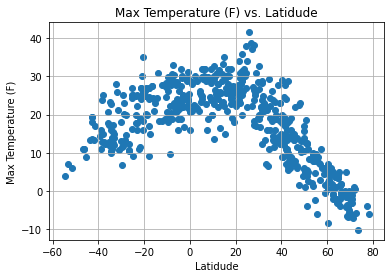

In [49]:
plt.scatter(clean_city_data.iloc[:,1],clean_city_data.iloc[:,3])
plt.xlabel('Latidude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature (F) vs. Latidude')
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

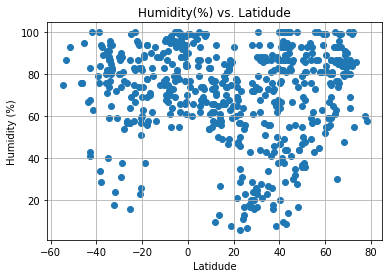

In [50]:
plt.scatter(clean_city_data.iloc[:,1],clean_city_data.iloc[:,4])
plt.xlabel('Latidude')
plt.ylabel('Humidity (%)')
plt.title('Humidity(%) vs. Latidude')
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

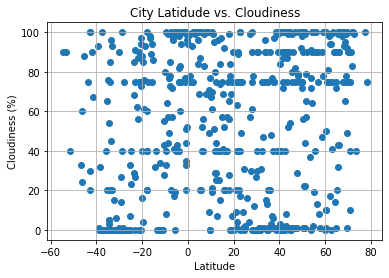

In [13]:
plt.scatter(clean_city_data.iloc[:,1],clean_city_data.iloc[:,5])
plt.xlabel('Latidude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latidude vs. Cloudiness')
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

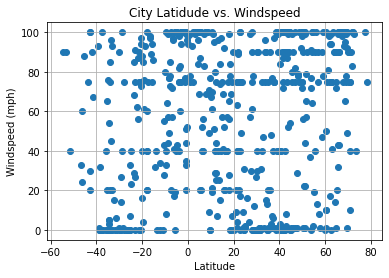

In [14]:
plt.scatter(clean_city_data.iloc[:,1],clean_city_data.iloc[:,5])
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('City Latidude vs. Windspeed')
plt.grid(True)
plt.show()

## Linear Regression

In [15]:
northern_hemi = clean_city_data.loc[clean_city_data["lat"] >= 0]
southern_hemi = clean_city_data.loc[clean_city_data["lat"] < 0]    

clean_city_data.head()

,City,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,County,Date
0,Hobart,-42.8794,147.3294,19.44,68,20,3.60,AU,1619760153
1,Maniitsoq,65.4167,-52.9000,1.55,74,43,2.32,GL,1619760281
2,Bluff,-46.6000,168.3333,11.11,76,33,4.92,NZ,1619760281
3,Barry,51.4067,-3.2694,5.00,81,57,2.57,GB,1619760181
4,Mataura,-46.1927,168.8643,11.11,76,24,4.92,NZ,1619760282


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

#### My Findings: 
In the Northern Hemisphere the max temperature decreases linearly as you go further North.

r value = -.86 indicating a strong negitive linear relationship 

The r-value is:-0.8638124101027365


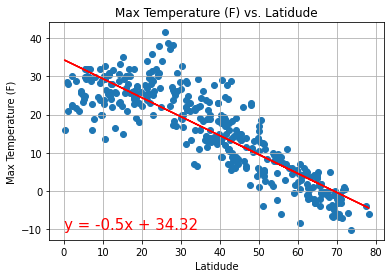

In [54]:
x_values = northern_hemi.iloc[:,1]
y_values = northern_hemi.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is:{rvalue}")
plt.scatter(northern_hemi.iloc[:,1],northern_hemi.iloc[:,3])
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latidude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature (F) vs. Latidude')
plt.grid(True)
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

#### My Findings: 
In the Souther Hemisphere the max temperature decreases linearly as you go further south.

r value = -.64 indicating a strong negitive linear relationship 

The r-value is:0.6427124668237206


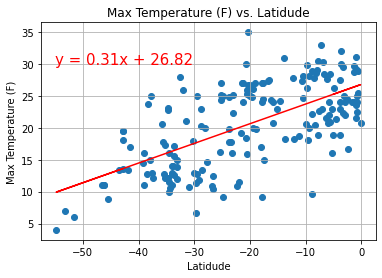

In [53]:
x_values = southern_hemi.iloc[:,1]
y_values = southern_hemi.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is:{rvalue}")
plt.scatter(southern_hemi.iloc[:,1],southern_hemi.iloc[:,3])
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latidude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature (F) vs. Latidude')
plt.grid(True)
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### My Findings: 
In the Northern Hemisphere the humidity might slightly as you go further North although the r value is 0.17 which indicates a weak positive linear realitionship.


The r-value is:0.1696066861897817


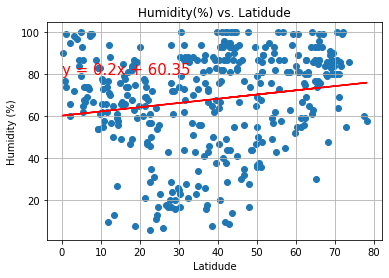

In [51]:
x_values = northern_hemi.iloc[:,1]
y_values = northern_hemi.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is:{rvalue}")
plt.scatter(northern_hemi.iloc[:,1],northern_hemi.iloc[:,4])
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latidude')
plt.ylabel('Humidity (%)')
plt.title('Humidity(%) vs. Latidude')
plt.grid(True)
plt.annotate(line_eq,(0,80),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### My Findings: 
In the Souther Hemisphere the humidity slightly increases as you go further south.

r value = -.64 indicating a moderate negitive linear relationship 

The r-value is:0.1864816787888953


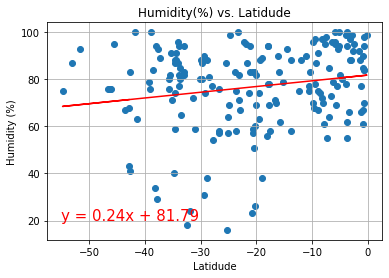

In [52]:
x_values = southern_hemi.iloc[:,1]
y_values = southern_hemi.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is:{rvalue}")

plt.scatter(southern_hemi.iloc[:,1],southern_hemi.iloc[:,4])
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latidude')
plt.ylabel('Humidity (%)')
plt.title('Humidity(%) vs. Latidude')
plt.grid(True)
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### My Findings: 
In the Northern Hemisphere the cloudiness does not appear to have a corelation with latitude. 

The r value = 0.133 indicating a weak linear relationship


The r-value is:0.13331639310361337


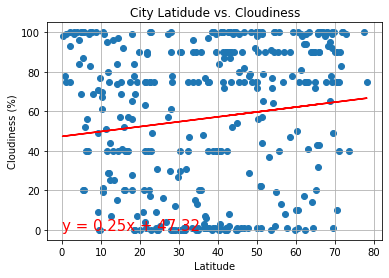

In [39]:
x_values = northern_hemi.iloc[:,1]
y_values = northern_hemi.iloc[:,5]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is:{rvalue}")

plt.scatter(northern_hemi.iloc[:,1],northern_hemi.iloc[:,5])

plt.xlabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.ylabel('Cloudiness (%)')
plt.title('City Latidude vs. Cloudiness')
plt.grid(True)
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


#### My Findings: 
In the Southern Hemisphere the cloudiness slightly increases as you go further South. 

The r value = 0.32 indicating a moderate linear realationship


The r-value is:0.322591650886272


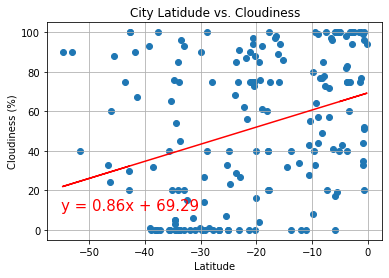

In [40]:
x_values = southern_hemi.iloc[:,1]
y_values = southern_hemi.iloc[:,5]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is:{rvalue}")

plt.scatter(southern_hemi.iloc[:,1],southern_hemi.iloc[:,5])
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latidude vs. Cloudiness')
plt.grid(True)
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:0.13331639310361337


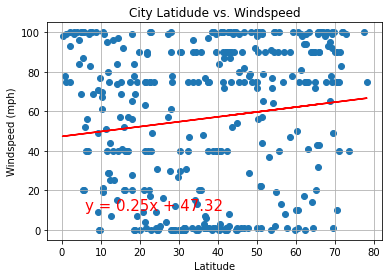

In [55]:
x_values = northern_hemi.iloc[:,1]
y_values = northern_hemi.iloc[:,5]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is:{rvalue}")
plt.scatter(northern_hemi.iloc[:,1],northern_hemi.iloc[:,5])
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('City Latidude vs. Windspeed')
plt.grid(True)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:0.322591650886272


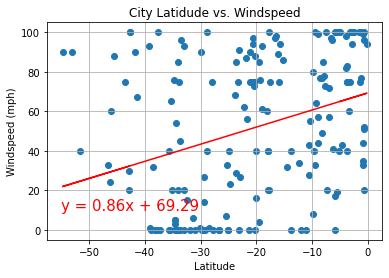

In [57]:
x_values = southern_hemi.iloc[:,1]
y_values = southern_hemi.iloc[:,5]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is:{rvalue}")
plt.scatter(southern_hemi.iloc[:,1],southern_hemi.iloc[:,5])
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('City Latidude vs. Windspeed')
plt.grid(True)
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.show()